## This dataset is taken from the New York City Open Data website. There are 683,788 trees planted along NYC streets, and this is the data for them.

### Import necessary libraries

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
tree_census = pd.read_csv(r'C:\Users\seven\Downloads\2015_Street_Tree_Census_-_Tree_Data_20250511.csv')
tree_census

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,NaN,NaN,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,NaN,NaN,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,NaN,NoDamage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,Damage,Volunteer,NaN,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,NaN,NaN,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


### Showing columns to easily pick which ones aren't useful

In [6]:
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [7]:
tree_census_subset = tree_census[['tree_id', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_common', 'steward',
       'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,red maple,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,pin oak,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,honeylocust,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,American linden,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,pin oak,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Kentucky yellowwood,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,red maple,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,red maple,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No


In [8]:
tree_census_subset.isna().sum()

tree_id            0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health         31616
spc_common     31619
steward       519438
sidewalk       31616
problems      457944
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
dtype: int64

### Looking into the 'health' column to see what information is missing

In [10]:
tree_census_subset[tree_census_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


##### Noticing that null 'health' values might be similar to null values in 'spc_common', 'steward', 'sidewalk' & 'problems'

### Running describe to view descriptive numerical tendency, dispersion and shape of dataset

In [13]:
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


##### Wow! Somewhere in New York City, there is a tree or stump that measures 450 cm (~14.75 feet) in circumferance

In [15]:
tree_census_subset.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_common    object
steward       object
sidewalk      object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
dtype: object

### Show distribution through histograms and checking for outliers

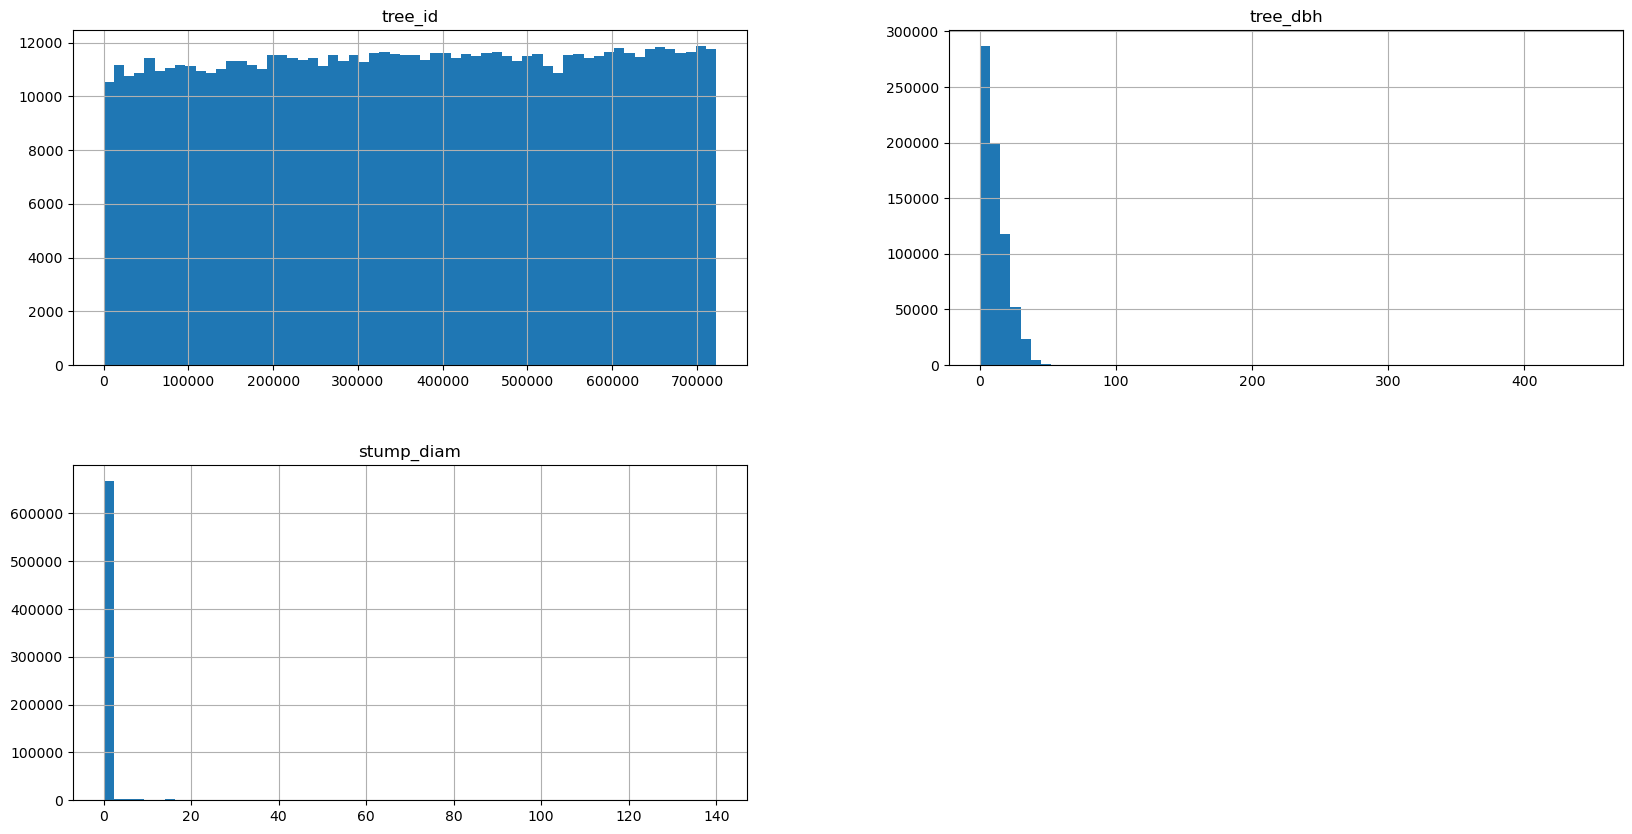

In [17]:
tree_census_subset.hist(bins=60, figsize=(20,10));

##### 'stump_diam' and 'tree_dbh' show significant void areas- possible user error when entering the diameter

In [19]:
big_trees = tree_census_subset[tree_census_subset['tree_dbh']>50]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,swamp white oak,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,silver maple,NaN,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,silver maple,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,pin oak,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,honeylocust,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,pin oak,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,silver maple,NaN,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,white oak,NaN,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,pin oak,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No


##### fairly significant amount of 'big trees'

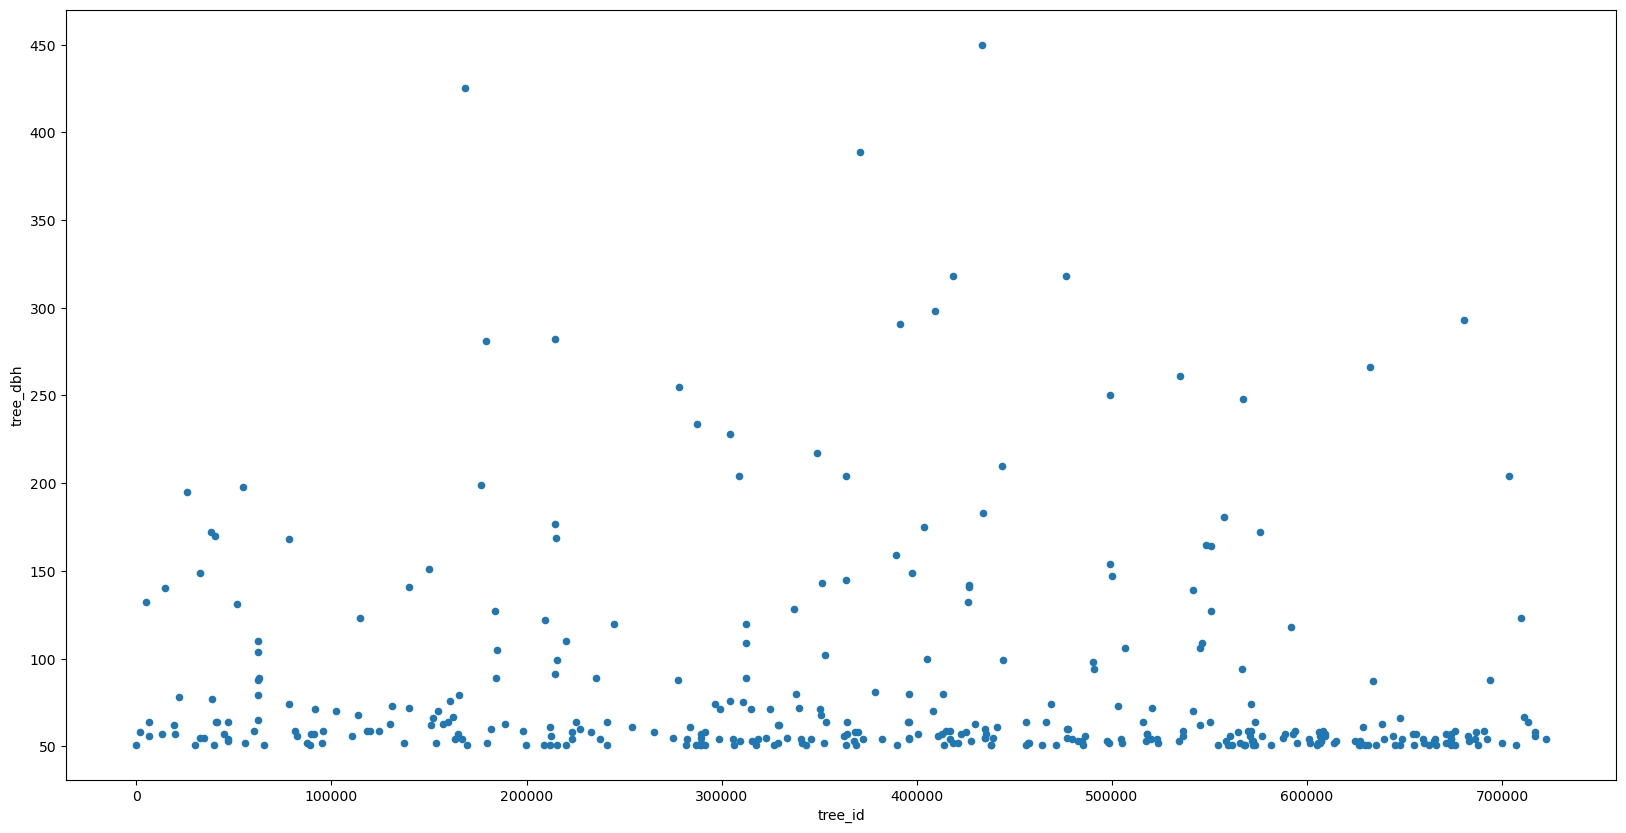

In [21]:
big_trees[['tree_id', 'tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh', figsize=(20,10));

##### Although the outliers have large numbers, it's not an outlandish metric.

### Comparing 'tree_dbh' to 'stump_diam'

In [24]:
big_stumps = tree_census_subset[tree_census_subset['stump_diam']>50]
big_stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
6122,200925,0,52,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6177,200924,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
9872,192215,0,53,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645994,135904,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646336,151125,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
649174,154188,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
652690,154181,0,60,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


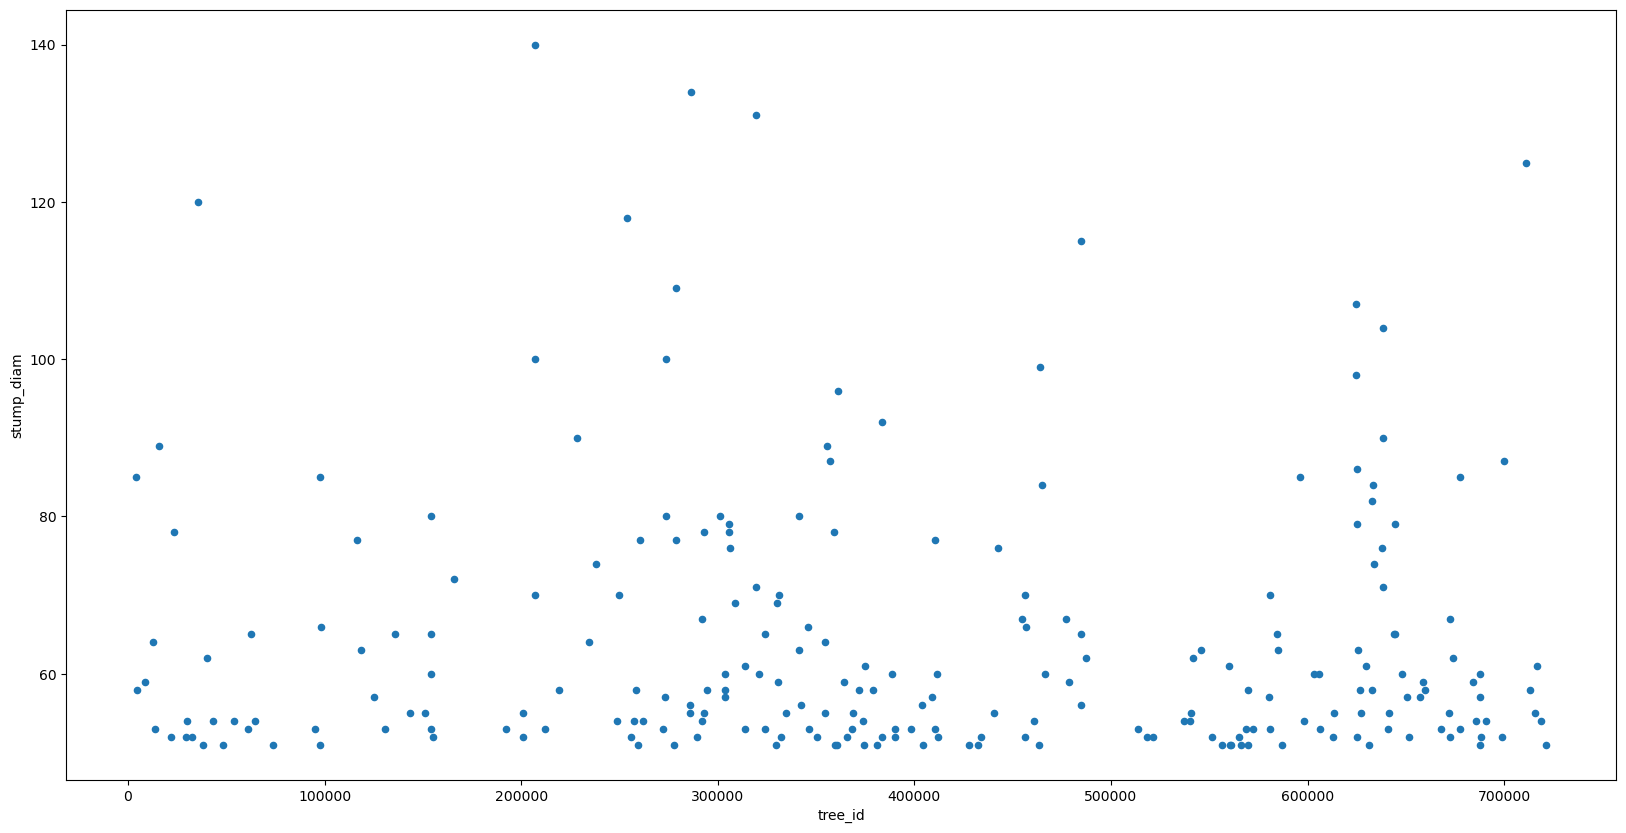

In [25]:
big_stumps[['tree_id', 'stump_diam']].plot(kind='scatter', x='tree_id', y='stump_diam', figsize=(20,10));

##### Although there are outliers, most likely the data given was accurate.

### Checking the distribution of tree species ('spc_common')

In [28]:
pd.DataFrame(tree_census_subset['spc_common'].value_counts())

,count
spc_common,
London planetree,87014
honeylocust,64264
Callery pear,58931
pin oak,53185
Norway maple,34189
...,...
black pine,37
pitch pine,33
Osage-orange,29


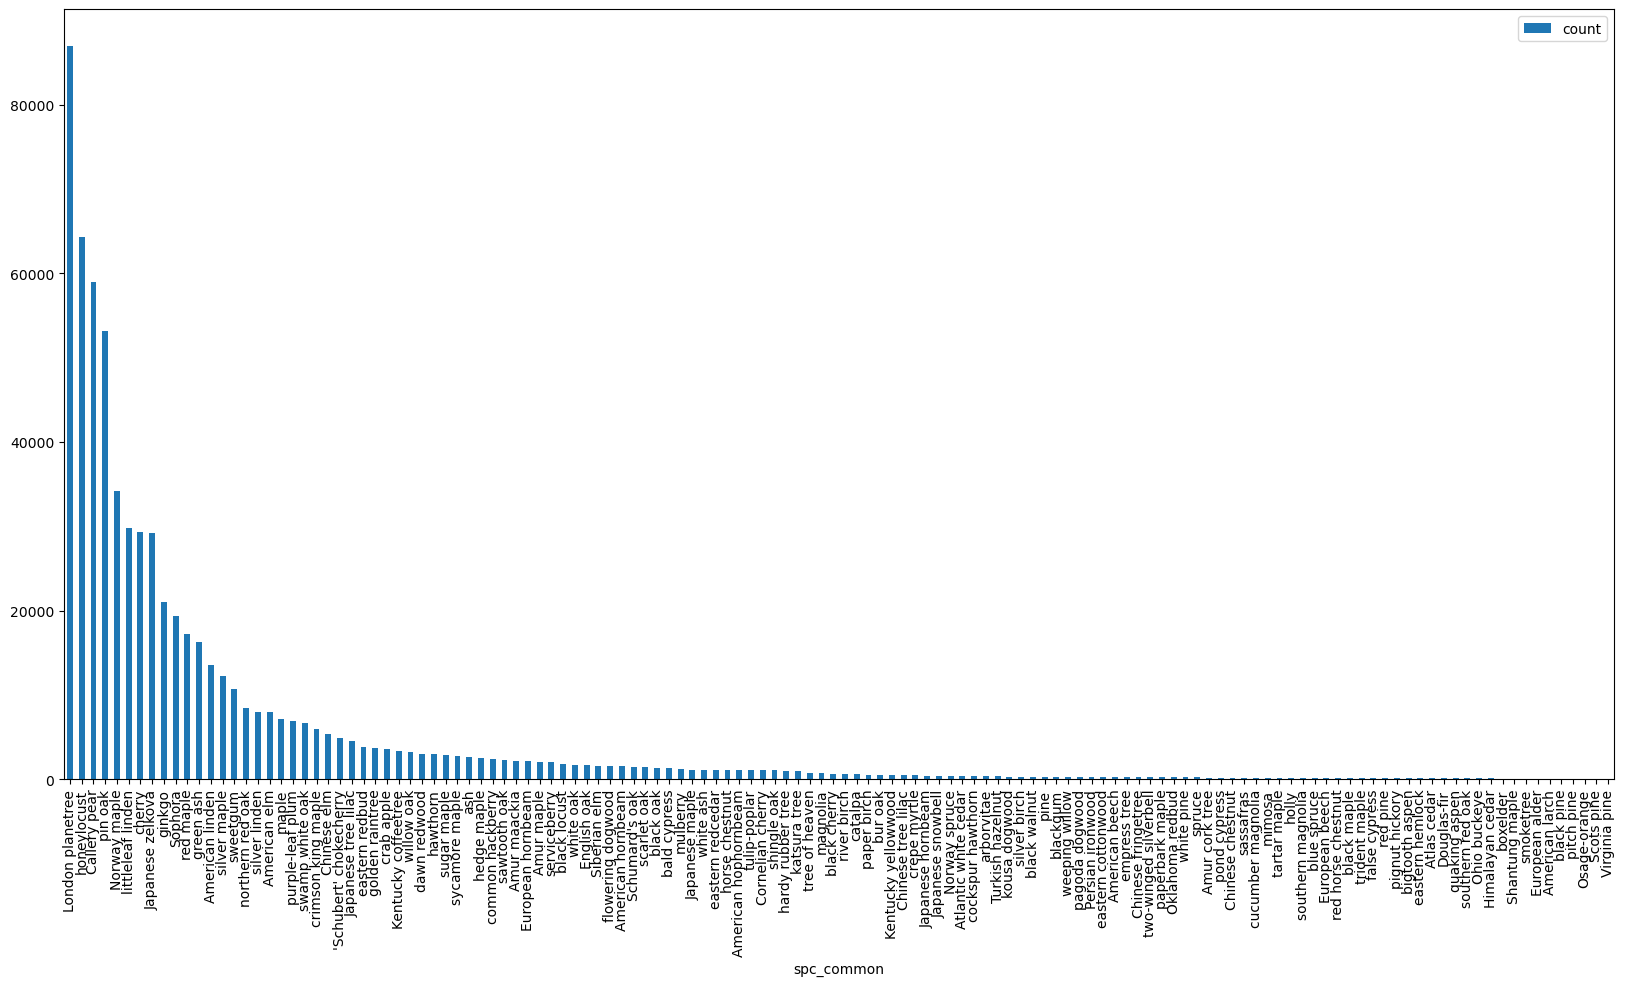

In [29]:
pd.DataFrame(tree_census_subset['spc_common'].value_counts()).plot(kind='bar', figsize=(20,10));

##### Not the easiest graph to read, but it does show a majority of tree species

### Looking into the 'steward' (caretakers), 'sidewalk', 'status' & 'curb_loc' of the data.

In [32]:
tree_census_subset['steward'].value_counts()

steward
1or2       143557
3or4        19183
4orMore      1610
Name: count, dtype: int64

##### Very clean data. It could have easily been entered as '1 to 2', '1', '2', '1 + 2', etc.

In [34]:
tree_census_subset['sidewalk'].value_counts()

sidewalk
NoDamage    464978
Damage      187194
Name: count, dtype: int64

In [35]:
tree_census_subset['status'].value_counts()

status
Alive    652173
Stump     17654
Dead      13961
Name: count, dtype: int64

In [36]:
tree_census_subset['curb_loc'].value_counts()

curb_loc
OnCurb            656896
OffsetFromCurb     26892
Name: count, dtype: int64

##### Also clean data

### Checking for 'status' mismatches- if a tree is a stump or dead, it's health should not be 'good'

In [39]:
stumps = tree_census_subset[tree_census_subset['status'] == 'Stump']
stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [40]:
deads = tree_census_subset[tree_census_subset['status'] == 'Dead']
deads

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


##### With 17654 stumps and 13961 deads (31615 total), this should match the null value of 'health'

In [42]:
tree_census_subset.isna().sum()

tree_id            0
tree_dbh           0
stump_diam         0
curb_loc           0
status             0
health         31616
spc_common     31619
steward       519438
sidewalk       31616
problems      457944
root_stone         0
root_grate         0
root_other         0
trunk_wire         0
trnk_light         0
trnk_other         0
brch_light         0
brch_shoe          0
brch_other         0
dtype: int64

##### 1 off. Close enough, but looking into the outlier

In [44]:
dead_or_stump_trees = stumps + deads
dead_or_stump_trees.apply(pd.Series)

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Row count checks out. Most likely header name is a cell and not from a table (spredsheet uploaded as worksheet)

### Explore distribution of binary columns

In [47]:
tree_problems = tree_census_subset[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [48]:
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


##### Looks like 'root_stone' a common problem

## Cleaning the dataset

### Renaming values within dataset

In [52]:
mask = ((tree_census_subset['status'] == 'Stump') | (tree_census_subset['status'] == 'Dead'))

In [53]:
tree_census_subset.loc[mask] = tree_census_subset.loc[mask].fillna('N/A')

In [54]:
tree_census_subset[tree_census_subset['status'] == 'Stump']

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,N/A,N/A,N/A,N/A,N/A,No,No,No,No,No,No,No,No,No


In [55]:
tree_census_subset['steward'] = tree_census_subset['steward'].replace("", pd.NA).fillna("N/A")
tree_census_subset['problems'] = tree_census_subset['problems'].replace("", pd.NA).fillna("None")

In [56]:
tree_census_subset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        1
spc_common    5
steward       0
sidewalk      1
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

In [57]:
tree_census_subset['problems'].fillna('None', inplace=True)
tree_census_subset['health'].fillna('Good', inplace=True)
tree_census_subset['spc_common'].fillna('Not Classified', inplace=True)
tree_census_subset['sidewalk'].fillna('NoDamaage', inplace=True)

In [58]:
tree_census_subset.isna().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_common    0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

### The rest of the outliers

In [60]:
tree_census_subset = tree_census_subset[(tree_census_subset['tree_dbh']<=60) | (tree_census_subset['stump_diam']<=60)]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,red maple,N/A,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,pin oak,N/A,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,honeylocust,N/A,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,American linden,N/A,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,pin oak,N/A,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Kentucky yellowwood,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,red maple,N/A,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,red maple,N/A,NoDamage,None,No,No,No,No,No,No,No,No,No


In [61]:
tree_census_subset_alive = tree_census_subset[tree_census_subset['status'] == 'Alive']
tree_census_subset_dead_or_stump = tree_census_subset[
    (tree_census_subset['status'] == 'Dead') |
    (tree_census_subset['status'] == 'Stump')]

In [62]:
tree_census_subset_alive.groupby('spc_common')['tree_dbh'].describe()

,count,mean,std,min,25%,50%,75%,max
spc_common,,,,,,,,
'Schubert' chokecherry,4888.0,4.892390,2.656572,0.0,3.0,4.0,6.00,36.0
American beech,273.0,6.450549,7.290098,1.0,3.0,4.0,7.00,54.0
American elm,7975.0,11.953229,9.426278,0.0,4.0,9.0,17.00,65.0
American hophornbeam,1081.0,6.049029,5.368668,1.0,3.0,4.0,7.00,48.0
American hornbeam,1517.0,4.921556,4.101102,0.0,3.0,4.0,6.00,50.0
...,...,...,...,...,...,...,...,...
weeping willow,282.0,15.797872,10.211549,1.0,7.0,14.0,23.00,41.0
white ash,1121.0,12.672614,6.690802,2.0,8.0,12.0,16.00,43.0
white oak,1686.0,7.458482,7.979447,1.0,3.0,4.0,8.00,56.0


##### Showing min value of 0, looking further into this

In [64]:
tree_census_subset_alive[tree_census_subset_alive['tree_dbh']==0]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
5312,38793,0,0,OnCurb,Alive,Good,smoketree,3or4,Damage,None,No,No,No,No,No,No,No,No,No
30524,204988,0,0,OnCurb,Alive,Good,willow oak,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
44772,241329,0,0,OffsetFromCurb,Alive,Good,crab apple,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
47154,173248,0,0,OnCurb,Alive,Good,swamp white oak,N/A,NoDamage,None,No,No,No,No,No,No,No,No,No
47484,204173,0,0,OnCurb,Alive,Poor,Norway spruce,N/A,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658977,162280,0,0,OnCurb,Alive,Poor,swamp white oak,N/A,Damage,None,No,No,No,No,No,No,No,No,No
671073,17796,0,0,OnCurb,Alive,Fair,bald cypress,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
671971,120612,0,0,OnCurb,Alive,Good,eastern redcedar,N/A,NoDamage,None,No,No,No,No,No,No,No,No,No
672443,116239,0,0,OnCurb,Alive,Good,Japanese maple,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No


In [65]:
stats_alive = tree_census_subset_alive.groupby('spc_common')['tree_dbh'].describe().reset_index()[['spc_common', '25%', '75%']]
stats_alive

,spc_common,25%,75%
0,'Schubert' chokecherry,3.0,6.00
1,American beech,3.0,7.00
2,American elm,4.0,17.00
3,American hophornbeam,3.0,7.00
4,American hornbeam,3.0,6.00
...,...,...,...
128,weeping willow,7.0,23.00
129,white ash,8.0,16.00
130,white oak,3.0,8.00
131,white pine,6.0,17.75


In [66]:
tree_census_subset_alive.merge(stats_alive, on='spc_common', how='left')

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,3,0,OnCurb,Alive,Fair,red maple,N/A,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,pin oak,N/A,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,honeylocust,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,honeylocust,N/A,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,American linden,N/A,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652168,155433,25,0,OnCurb,Alive,Good,pin oak,N/A,Damage,None,No,No,No,No,No,No,No,No,No,8.0,24.0
652169,183795,7,0,OnCurb,Alive,Good,Kentucky yellowwood,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No,3.0,5.0
652170,166161,12,0,OnCurb,Alive,Good,red maple,N/A,Damage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
652171,184028,9,0,OnCurb,Alive,Good,red maple,N/A,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0


In [70]:
# Calculate the 25th and 75th percentiles
q25 = tree_census_subset_alive['tree_dbh'].quantile(0.25)
q75 = tree_census_subset_alive['tree_dbh'].quantile(0.75)

# Cap values below the 25th percentile
mask_low = tree_census_subset_alive['tree_dbh'] < q25
tree_census_subset_alive.loc[mask_low, 'tree_dbh'] = q25

# Cap values above the 75th percentile
mask_high = tree_census_subset_alive['tree_dbh'] > q75
tree_census_subset_alive.loc[mask_high, 'tree_dbh'] = q75

In [72]:
tree_census_subset_alive['tree_dbh'] = tree_census_subset_alive['tree_dbh'].clip(lower=q25, upper=q75)